In [1]:
!pip install pandas fiona shapely pyproj rtree

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
!pip install contextily

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
!pip install topojson

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [5]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/inseefrlab/cartiflette (to revision 80b8a5a28371feb6df31d55bcc2617948a5f9b1a) to /tmp/pip-req-build-q8q5dpxr
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-q8q5dpxr
  Running command git rev-parse -q --verify 'sha^80b8a5a28371feb6df31d55bcc2617948a5f9b1a'
  Running command git fetch -q https://github.com/inseefrlab/cartiflette 80b8a5a28371feb6df31d55bcc2617948a5f9b1a
  Running command git checkout -q 80b8a5a28371feb6df31d55bcc2617948a5f9b1a
  Resolved https://github.com/inseefrlab/cartiflette to commit 80b8a5a28371feb6df31d55bcc2617948a5f9b1a
  Installing build dependencies ... done
  Getting requirements to build 


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from cartiflette.s3 import download_vectorfile_url_all

/home/cathu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Visualisation des bases

### Aménagement velo

In [8]:
a_velo= gpd.read_file('amenagements-velo-en-ile-de-france.geojson')

In [9]:
a_velo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
a_velo.shape

(112217, 15)

In [11]:
a_velo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 112217 entries, 0 to 112216
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   osm_id      112217 non-null  float64 
 1   nom_com     112217 non-null  object  
 2   sens_voit   112217 non-null  object  
 3   ag          43905 non-null   object  
 4   panneaux    1077 non-null    object  
 5   moyenn_ech  112217 non-null  object  
 6   revetement  73506 non-null   object  
 7   highway     112217 non-null  object  
 8   insee_com   112217 non-null  object  
 9   nom_voie    80231 non-null   object  
 10  longueur    112217 non-null  int64   
 11  petite_ech  112217 non-null  object  
 12  nv          102669 non-null  object  
 13  ad          43695 non-null   object  
 14  geometry    112206 non-null  geometry
dtypes: float64(1), geometry(1), int64(1), object(12)
memory usage: 12.8+ MB


In [12]:
a_velo.head(10)

,osm_id,nom_com,sens_voit,ag,panneaux,moyenn_ech,revetement,highway,insee_com,nom_voie,longueur,petite_ech,nv,ad,geometry
0,4.014620e+08,Chelles,DOUBLE,None,None,32,None,service,77108,Rue de la Mare Longue Noue,24,3,limite 30,None,"LINESTRING (2.60486 48.89065, 2.60460 48.89061..."
1,4.048666e+08,La Queue-en-Brie,NC,chemin service site propre uni,None,11,None,track,94060,Allée Jacquette,39,1,hors voirie,chemin service site propre uni,"LINESTRING (2.60049 48.77164, 2.60036 48.77198)"
2,1.154304e+09,Lésigny,NC,voie verte uni,None,11,asphalt,path,77249,None,5,1,hors voirie,voie verte uni,"LINESTRING (2.60844 48.74126, 2.60848 48.74130)"
3,3.300503e+08,Pontault-Combault,UNIQUE,DSC bande,None,22,None,residential,77373,Rue de la Chaussée,85,2,None,None,"LINESTRING (2.60422 48.78336, 2.60419 48.78331..."
4,1.104033e+09,Champs-sur-Marne,UNIQUE,None,None,22,asphalt,residential,77083,Place Pablo Picasso,8,2,None,bande uni,"LINESTRING (2.60568 48.84171, 2.60557 48.84170)"
5,3.823147e+07,Pontault-Combault,NC,autre chemin velo uni,None,41,asphalt,footway,77373,None,175,4,hors voirie,autre chemin velo uni,"LINESTRING (2.60852 48.80017, 2.60844 48.80028..."
6,1.669914e+08,Chelles,UNIQUE,None,None,22,asphalt,residential,77108,Avenue du Gendarme Castermant,310,2,None,bande uni,"LINESTRING (2.60713 48.87821, 2.60683 48.87820..."
7,1.143141e+08,Chelles,UNIQUE,None,None,22,asphalt,residential,77108,Avenue du Gendarme Castermant,87,2,None,bande uni,"LINESTRING (2.60713 48.87812, 2.60745 48.87813..."
8,7.046037e+08,Chelles,DOUBLE,None,None,32,asphalt,residential,77108,Quai des Mariniers,185,3,limite 30,None,"LINESTRING (2.59604 48.86748, 2.59609 48.86747..."
9,1.438193e+08,Mitry-Mory,NC,piste uni,FR:B22a,11,asphalt,cycleway,77294,None,471,1,hors voirie,piste uni,"LINESTRING (2.57422 48.99130, 2.57457 48.99142..."


La base a_velo : aménagement cyclble en ile de France contien les informations sur les informations sur les aménagements cyclables en île de France ainsi que leur localisation. Il s'agit de 112217 observations décritent suivant 15 variables dont les plus pertinentes pour cette études sont : insee_com, longueur et geometry

#### Analyse des valeurs manquantes

In [13]:
a_velo.isnull().sum()

osm_id             0
nom_com            0
sens_voit          0
ag             68312
panneaux      111140
moyenn_ech         0
revetement     38711
highway            0
insee_com          0
nom_voie       31986
longueur           0
petite_ech         0
nv              9548
ad             68522
geometry          11
dtype: int64

<Axes: >

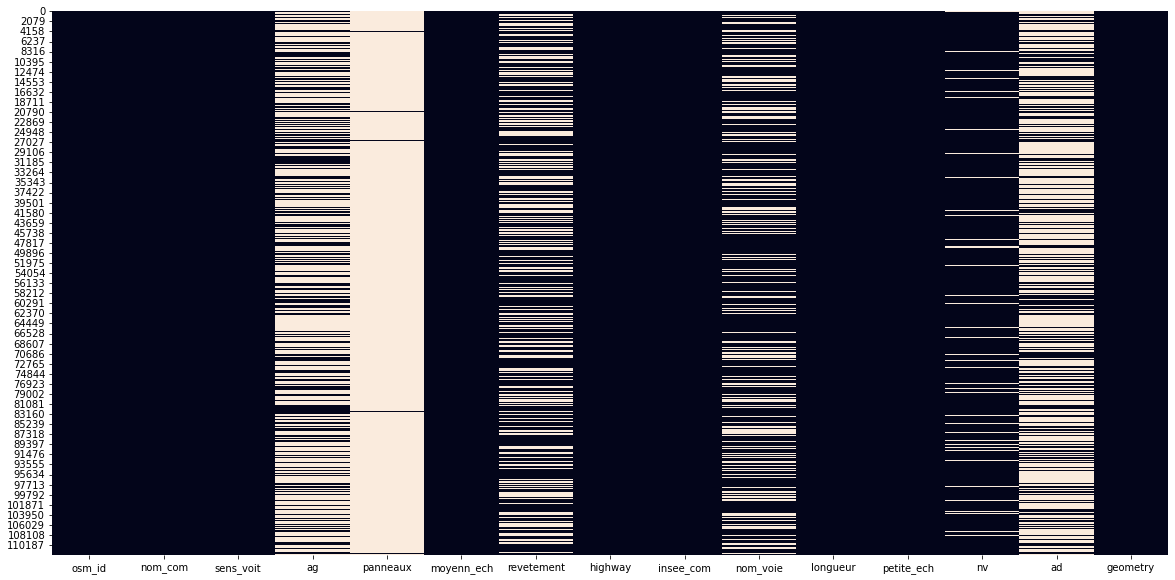

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(a_velo.isna(), cbar=False)

De l'observation du tableau récapitulatif des valeurs manquantes, on constate que la variable géométrie contient des valeurs manquantes. Compte tenu de la taille de la base, la proportion de valeurs manquantes est insignifiante.

#### Communes

In [15]:
communes = download_vectorfile_url_all(
    crs = 4326,
    borders="COMMUNE_ARRONDISSEMENT",
    values = ["75","77","78","91", "92", "93", "94","95"],
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 40.1kiB [00:00, 4.99MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=77/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.57MiB [00:00, 20.7MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=78/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 581kiB [00:00, 14.7MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=91/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 483kiB [00:00, 14.0MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=92/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 63.0kiB [00:00, 5.26MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=93/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 120kiB [00:00, 6.49MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=94/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 111kiB [00:00, 7.86MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=95/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 372kiB [00:00, 14.3MiB/s]


In [16]:
communes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1287 entries, 0 to 183
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          1287 non-null   object  
 1   ID          0 non-null      object  
 2   NOM         1287 non-null   object  
 3   NOM_M       1287 non-null   object  
 4   INSEE_COM   1287 non-null   object  
 5   STATUT      1287 non-null   object  
 6   POPULATION  1287 non-null   int64   
 7   INSEE_CAN   1287 non-null   object  
 8   INSEE_ARR   1287 non-null   object  
 9   INSEE_DEP   1287 non-null   object  
 10  INSEE_REG   1287 non-null   object  
 11  SIREN_EPCI  1287 non-null   object  
 12  source      1287 non-null   object  
 13  INSEE_COG   1287 non-null   object  
 14  geometry    1287 non-null   geometry
dtypes: geometry(1), int64(1), object(13)
memory usage: 160.9+ KB


In [17]:
communes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
communes.shape

(1287, 15)

In [19]:
communes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1287 entries, 0 to 183
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          1287 non-null   object  
 1   ID          0 non-null      object  
 2   NOM         1287 non-null   object  
 3   NOM_M       1287 non-null   object  
 4   INSEE_COM   1287 non-null   object  
 5   STATUT      1287 non-null   object  
 6   POPULATION  1287 non-null   int64   
 7   INSEE_CAN   1287 non-null   object  
 8   INSEE_ARR   1287 non-null   object  
 9   INSEE_DEP   1287 non-null   object  
 10  INSEE_REG   1287 non-null   object  
 11  SIREN_EPCI  1287 non-null   object  
 12  source      1287 non-null   object  
 13  INSEE_COG   1287 non-null   object  
 14  geometry    1287 non-null   geometry
dtypes: geometry(1), int64(1), object(13)
memory usage: 160.9+ KB


In [20]:
communes[ communes['INSEE_DEP']=='94']

,id,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,source,INSEE_COG,geometry
0,COMMUNE_0000000009736525,None,Vincennes,VINCENNES,94080,Commune simple,49788,98,2,94,11,200054781/200057941,IGN:EXPRESS-COG-CARTO-TERRITOIRE,94080,"POLYGON ((2.42758 48.84157, 2.42760 48.84172, ..."
1,COMMUNE_0000000009737016,None,Fresnes,FRESNES,94034,Commune simple,28710,10,3,94,11,200054781/200058014,IGN:EXPRESS-COG-CARTO-TERRITOIRE,94034,"POLYGON ((2.34393 48.75632, 2.34314 48.75551, ..."
2,COMMUNE_0000000009737017,None,Chevilly-Larue,CHEVILLY-LARUE,94021,Commune simple,19988,19,3,94,11,200054781/200058014,IGN:EXPRESS-COG-CARTO-TERRITOIRE,94021,"POLYGON ((2.34393 48.75632, 2.34317 48.75666, ..."
3,COMMUNE_0000000009737014,None,Rungis,RUNGIS,94065,Commune simple,5657,19,3,94,11,200054781/200058014,IGN:EXPRESS-COG-CARTO-TERRITOIRE,94065,"POLYGON ((2.33054 48.74825, 2.33128 48.74881, ..."
4,COMMUNE_0000000009736530,None,Charenton-le-Pont,CHARENTON-LE-PONT,94018,Commune simple,29882,05,2,94,11,200054781/200057941,IGN:EXPRESS-COG-CARTO-TERRITOIRE,94018,"POLYGON ((2.41593 48.81625, 2.41585 48.81624, ..."
5,COMMUNE_0000000009737474,None,Orly,ORLY,94054,Commune simple,24627,15,3,94,11,200054781/200058014,IGN:EXPRESS-COG-CARTO-TERRITOIRE,94054,"POLYGON ((2.36934 48.74613, 2.36941 48.74613, ..."
6,COMMUNE_0000000009736529,None,Ivry-sur-Seine,IVRY-SUR-SEINE,94041,Commune simple,63748,11,3,94,11,200054781/200058014,IGN:EXPRESS-COG-CARTO-TERRITOIRE,94041,"POLYGON ((2.39007 48.82569, 2.39264 48.82394, ..."
7,COMMUNE_0000000009737011,None,Choisy-le-Roi,CHOISY-LE-ROI,94022,Commune simple,46150,06,3,94,11,200054781/200058014,IGN:EXPRESS-COG-CARTO-TERRITOIRE,94022,"POLYGON ((2.44230 48.76180, 2.44219 48.76172, ..."
8,COMMUNE_0000000009737005,None,Limeil-Brévannes,LIMEIL-BREVANNES,94044,Commune simple,27833,21,1,94,11,200054781/200058006,IGN:EXPRESS-COG-CARTO-TERRITOIRE,94044,"POLYGON ((2.49299 48.75928, 2.49307 48.75917, ..."
9,COMMUNE_0000000009736516,None,Chennevières-sur-Marne,CHENNEVIERES-SUR-MARNE,94019,Commune simple,18039,04,1,94,11,200054781/200058006,IGN:EXPRESS-COG-CARTO-TERRITOIRE,94019,"POLYGON ((2.57154 48.79888, 2.57108 48.79868, ..."


In [21]:
com = communes[((communes['INSEE_DEP'].isin(["75", "92"])) & 
                (~communes['INSEE_COG'].isin(['92002', '92019', '92060', '92047', '92076','92033'])) 
                | (communes['INSEE_COG'].isin(['95018', '94081', '94041', '94037', '94076', '94002', 
                                               '94046', '94016', '94080', '94200', '94016', '94041', '94069',
                                               '94042', '94052', '94022', '94100', '94017', '93006', '93055', 
                                               '93001', '93070', '93066', '93048', '94033', '93063', '93053', 
                                               '93063', '93008', '93064', '94018'])))]


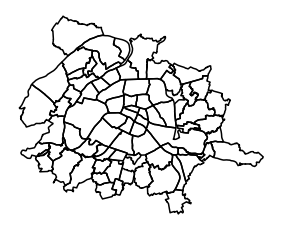

In [22]:
ax = com.boundary.plot(edgecolor = "k")
ax.set_axis_off()

La base communes fournie en plus des informations sur la populations communale, les coordonnées géographiques sur les communes qui nous serons utiles dans l'étude de la répartition des aménagements cyclables dans les communes.

In [23]:
communes.isnull().sum()

id               0
ID            1287
NOM              0
NOM_M            0
INSEE_COM        0
STATUT           0
POPULATION       0
INSEE_CAN        0
INSEE_ARR        0
INSEE_DEP        0
INSEE_REG        0
SIREN_EPCI       0
source           0
INSEE_COG        0
geometry         0
dtype: int64

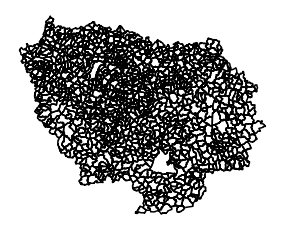

In [24]:
ax = communes.boundary.plot(edgecolor = "k")
ax.set_axis_off()

#### La base caractéristiques

In [25]:
caract = pd.read_csv('carcteristiques-2022.csv',sep=';')

In [26]:
caract.shape

(55302, 15)

In [27]:
caract.isnull().sum()

Accident_Id       0
jour              0
mois              0
an                0
hrmn              0
lum               0
dep               0
com               0
agg               0
int               0
atm               0
col               0
adr            1233
lat               0
long              0
dtype: int64

In [28]:
caract.sample(n=15)

,Accident_Id,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
41928,202200041929,20,9,2022,18:05,1,22,22113,2,1,1,2,PARK NEVEZ (AVENUE DE),"48,7296700000","-3,4471030000"
45939,202200045940,22,9,2022,16:10,1,69,69383,2,3,1,3,Quai Victor Augagneur,"45,7599500000","4,8410600000"
36789,202200036790,17,1,2022,12:15,1,75,75112,2,5,1,6,RUE CHALIGNY,"48,8501590000","2,3843570000"
21321,202200021322,9,3,2022,08:50,1,45,45126,1,1,1,6,D2060,"47,9053980000","2,1104110000"
16949,202200016950,3,2,2022,14:50,1,93,93050,2,1,1,3,LOUIS VANNINI (RUE),"48,8663500000","2,5278300000"
44945,202200044946,28,10,2022,18:40,2,52,52449,1,3,1,3,D122,"47,8316030000","5,3375960000"
47304,202200047305,29,3,2022,13:30,1,75,75116,2,7,2,3,PLACE DE VARSOVIE,"48,8603757545","2,2912305205"
43391,202200043392,28,10,2022,19:50,5,37,37261,2,2,1,3,GRAMMONT (AVENUE DE),"47,3759365506","0,6944721937"
38720,202200038721,14,7,2022,22:30,5,60,60551,2,4,1,1,Rue de Mello,"49,2915000000","2,3821400000"
42602,202200042603,14,6,2022,10:55,1,01,01376,2,1,1,1,Chemin de Thil,"45,8256740000","4,9826220000"


In [29]:
caract['long'] = caract['long'].astype(str).str.replace(',', '.')
caract['lat'] = caract['lat'].astype(str).str.replace(',', '.')
caract['long'] = pd.to_numeric(caract['long'], errors='coerce')
caract['lat'] = pd.to_numeric(caract['lat'], errors='coerce')

geometry = [Point(lon, lat) for lon, lat in zip(caract['long'], caract['lat'])]

acc = gpd.GeoDataFrame(caract, geometry=geometry)


NameError: name 'Point' is not defined

In [30]:
caract['long'] = caract['long'].astype(str).str.replace(',', '.')
caract['lat'] = caract['lat'].astype(str).str.replace(',', '.')
caract['long'] = pd.to_numeric(caract['long'], errors='coerce')
caract['lat'] = pd.to_numeric(caract['lat'], errors='coerce')
geometry = [Point(lon, lat) for lon, lat in zip(caract['long'], caract['lat'])]
acc = gpd.GeoDataFrame(caract, geometry=geometry)

NameError: name 'Point' is not defined

NameError: name 'acc' is not defined

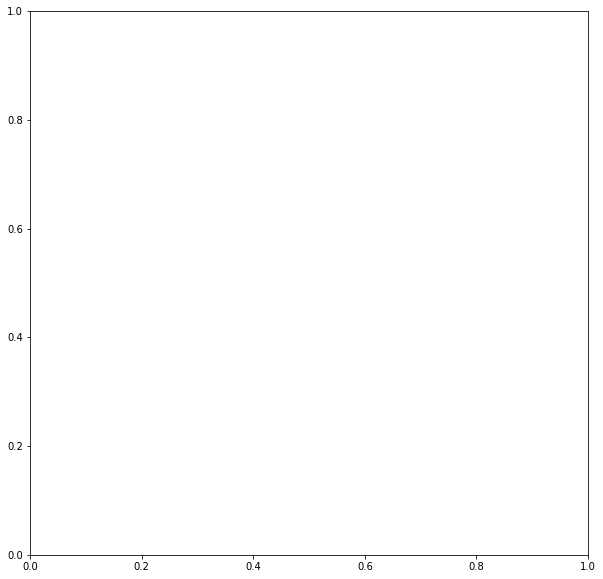

In [31]:
fig,ax = plt.subplots(figsize=(10, 10))
acc.plot(ax = ax, color = 'red')
communes.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none")
ax.set_axis_off()

### Vélib

In [32]:
url = "https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr"

In [33]:
velib = gpd.read_file(url)

In [34]:
velib.shape

(1471, 4)

In [35]:
velib.sample(n=15)

,capacity,name,stationcode,geometry
336,19,Carpeaux - Place Jacques Froment,18018,POINT (2.33094 48.89065)
800,36,Perle - Vieille du Temple,3008,POINT (2.36112 48.86013)
99,38,Place Amédée Gordini - Lefebvre,15201,POINT (2.29206 48.83062)
1186,17,Commandant l'Herminier - Gallieni,20004,POINT (2.41605 48.84704)
325,37,Franquet - Labrouste,15041,POINT (2.30676 48.83288)
160,33,Porte de Bagnolet,20022,POINT (2.40834 48.86471)
472,43,Cimetière de Montmartre,18003,POINT (2.33289 48.88647)
704,62,Place Lafayette,21306,POINT (2.26387 48.82965)
1002,36,Gare Rosny-Bois-Perrier,31103,POINT (2.48044 48.88115)
747,30,Saint-Séverin - Saint-Michel,5033,POINT (2.34409 48.85273)


In [36]:
velib.isna().sum()

capacity       0
name           0
stationcode    0
geometry       0
dtype: int64

#### la base lieu

In [37]:
lieu = pd.read_csv('lieux-2022.csv',sep=';')

/tmp/ipykernel_605025/4196488339.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  lieu = pd.read_csv('lieux-2022.csv',sep=';')


In [38]:
lieu.shape

(55302, 18)

In [39]:
lieu.isna().sum()

Num_Acc        0
catr           0
voie        4805
v1             0
v2         50047
circ           0
nbv            0
vosp           0
prof           0
pr             0
pr1            0
plan           0
lartpc     55274
larrout        0
surf           0
infra          0
situ           0
vma            0
dtype: int64

In [40]:
lieu

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202200000001,4,TEIL(vieille route du),0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
1,202200000002,4,NaN,0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
2,202200000003,3,ROND POINT DE BREZILLET,0,NaN,-1,2,0,1,0,0,1,NaN,-1,1,5,1,50
3,202200000004,4,QUATORZE JUILLET (RUE DU),0,NaN,1,1,0,2,(1),(1),1,NaN,4,1,0,1,30
4,202200000005,3,ROUTE DE JEAN MOULIN-RN 538,0,NaN,2,2,0,1,8,0,1,NaN,-1,1,0,1,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55297,202200055298,3,71,-1,NaN,2,2,0,2,(1),(1),1,NaN,-1,1,0,8,80
55298,202200055299,3,973,-1,NaN,2,2,0,1,29,0,2,NaN,-1,1,0,3,80
55299,202200055300,3,22,0,D,2,2,0,1,39,553,2,NaN,-1,7,0,3,80
55300,202200055301,3,18,-1,D,2,2,0,1,30,125,1,NaN,-1,1,0,1,80


In [41]:
velib.isnull().sum()

capacity       0
name           0
stationcode    0
geometry       0
dtype: int64

In [42]:
station = pd.read_json('station_information.json')

In [43]:
station['data'].head()

stations    [{'station_id': 213688169, 'name': 'Benjamin G...
Name: data, dtype: object

In [44]:
with open('station_information.json', 'r') as file:
    stations = json.load(file)
stations = stations['data']  
stations = pd.DataFrame(stations_data)
station = pd.json_normalize(stations['stations'])

NameError: name 'json' is not defined

In [45]:
geometry = [Point(lon, lat) for lon, lat in zip(station['lon'], station['lat'])]
base = gpd.GeoDataFrame(station, geometry=geometry)

KeyError: 'lon'

In [46]:
base.head()

NameError: name 'base' is not defined

In [47]:
base[base['stationCode']=='4012']

NameError: name 'base' is not defined

NameError: name 'base' is not defined

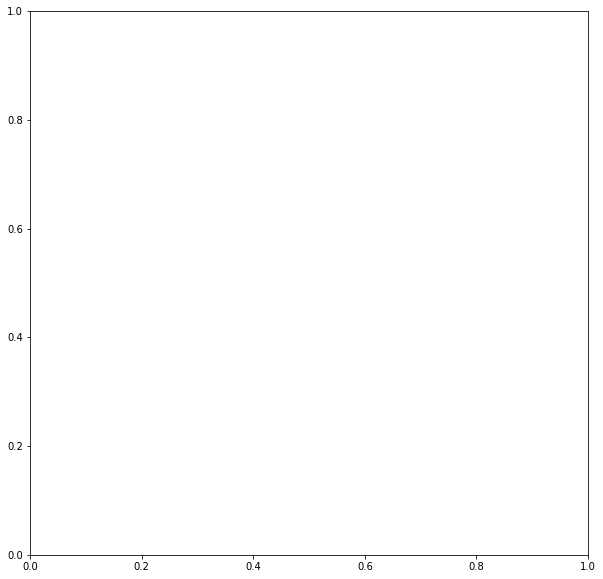

In [48]:
fig,ax = plt.subplots(figsize=(10, 10))
base.plot(ax = ax, color = 'red', alpha = 0.4)
com.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none")
ax.set_axis_off()

In [49]:
La base station et Velib c'est la même chose

SyntaxError: unterminated string literal (detected at line 1) (2575673478.py, line 1)

### Bus

In [50]:
bus = pd.read_json('amenagements-bus-en-ile-de-france.json')
bus

,datasetid,recordid,fields,geometry,record_timestamp
0,amenagements-bus-en-ile-de-france,92497385273ad9e4119956be5a2272e48ba51174,{'geo_shape': {'coordinates': [[2.658072799620...,"{'type': 'Point', 'coordinates': [2.6575204742...",2022-03-21T15:45:07.306+01:00
1,amenagements-bus-en-ile-de-france,a066ad848f6c0d675829a30bb910ac0a1c7c9044,{'geo_shape': {'coordinates': [[2.568781299917...,"{'type': 'Point', 'coordinates': [2.5687159331...",2022-03-21T15:45:07.306+01:00
2,amenagements-bus-en-ile-de-france,74ee46be3a78a3489dc7fd106dd3ddf817fe2307,{'geo_shape': {'coordinates': [[2.597638000193...,"{'type': 'Point', 'coordinates': [2.5976413901...",2022-03-21T15:45:07.306+01:00
3,amenagements-bus-en-ile-de-france,51b1323c4c4ff474e0a68820d58713a37aaa65c3,{'geo_shape': {'coordinates': [[2.601638000293...,"{'type': 'Point', 'coordinates': [2.6013868016...",2022-03-21T15:45:07.306+01:00
4,amenagements-bus-en-ile-de-france,f56d76f3655592cc4927e372802edcec56fe5569,{'geo_shape': {'coordinates': [[2.556829200207...,"{'type': 'Point', 'coordinates': [2.5499547115...",2022-03-21T15:45:07.306+01:00
...,...,...,...,...,...
2368,amenagements-bus-en-ile-de-france,d13dc169baf9522ff221cbbbe28b39172627fb2e,{'geo_shape': {'coordinates': [[2.322154307404...,"{'type': 'Point', 'coordinates': [2.3237984465...",2022-03-21T15:45:07.306+01:00
2369,amenagements-bus-en-ile-de-france,b1d79b76eba1ae471aecf9ba922d1d309d41efd8,{'geo_shape': {'coordinates': [[2.238071943310...,"{'type': 'Point', 'coordinates': [2.2390863407...",2022-03-21T15:45:07.306+01:00
2370,amenagements-bus-en-ile-de-france,0f5376dfc82fd5a5ee4022e169388681337fe264,{'geo_shape': {'coordinates': [[2.222336546715...,"{'type': 'Point', 'coordinates': [2.2225619829...",2022-03-21T15:45:07.306+01:00
2371,amenagements-bus-en-ile-de-france,17f0aa9616ba589d01d68a73f34e752a332d12b4,{'geo_shape': {'coordinates': [[2.358355934424...,"{'type': 'Point', 'coordinates': [2.3595798859...",2022-03-21T15:45:07.306+01:00


In [51]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   datasetid         2373 non-null   object
 1   recordid          2373 non-null   object
 2   fields            2373 non-null   object
 3   geometry          2373 non-null   object
 4   record_timestamp  2373 non-null   object
dtypes: object(5)
memory usage: 92.8+ KB


### Répartition des Parking vélo

In [52]:
url1 = 'https://data.iledefrance-mobilites.fr/api/explore/v2.1/catalog/datasets/parking-velos-ile-de-france-mobilites/exports/geojson?lang=fr&timezone=Europe%2FBerlin'

In [53]:
parking = gpd.read_file(url1)

In [54]:
parking.head()

,line_id,station_id,name,type,num_docks_available,is_installed,date_installed,price,price_navigo,web,project_owner,zdcld,zdcname,insee_code,municipality,x_long,y_lat,geo_point_2d,geometry
0,TER,1020,ANGERVILLE,abri,8,true,2023,None,NC,NC,SNCF,59403,Angerville,91016,Angerville,2.003650,48.311790,"{'lon': 2.00365, 'lat': 48.31179}",POINT (2.00365 48.31179)
1,T4,1011,ARBORETUM,abri,22,true - non labellisé,2021,None,NC,NC,IDFM,478648,Arboretum,93047,Montfermeil,2.560903,48.898066,"{'lon': 2.560903, 'lat': 48.898066}",POINT (2.56090 48.89807)
2,"J , E",272,AUBERGENVILLE-ELISABETHVILLE,consigne,20,true,2023,None,NC,https://sncf-parking-velos.iledefrance-mobilit...,SNCF,65490,Aubergenville Élisabethville,78029,Aubergenville,1.505610,48.581940,"{'lon': 1.50561, 'lat': 48.58194}",POINT (1.50561 48.58194)
3,R,16,BAGNEAUX-SUR-LOING,abri,20,true,2022,None,NC,NC,CC - Pays de Nemours,61145,Bagneaux-sur-Loing,77016,Bagneaux-sur-Loing,2.703306,48.230358,"{'lon': 2.703306, 'lat': 48.230358}",POINT (2.70331 48.23036)
4,R,15,BAGNEAUX-SUR-LOING,consigne,20,true,2022,None,NC,NC,CC - Pays de Nemours,61145,Bagneaux-sur-Loing,77016,Bagneaux-sur-Loing,2.703295,48.230334,"{'lon': 2.703295, 'lat': 48.230334}",POINT (2.70329 48.23033)


In [55]:
parking.shape

(377, 19)

In [56]:
parking.isna().sum()

line_id                  0
station_id               0
name                     0
type                     0
num_docks_available      0
is_installed             0
date_installed           0
price                  233
price_navigo             0
web                      0
project_owner            4
zdcld                    0
zdcname                  0
insee_code               0
municipality             7
x_long                   0
y_lat                    0
geo_point_2d             0
geometry                 0
dtype: int64

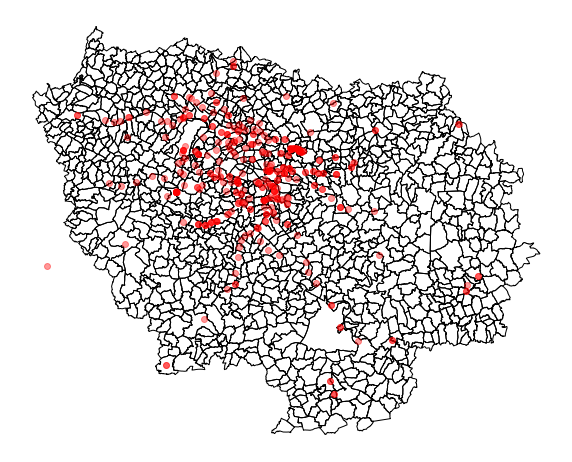

In [57]:
fig,ax = plt.subplots(figsize=(10, 10))
parking.plot(ax = ax, color = 'red', alpha = 0.4, zorder=2)
communes.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none")
ax.set_axis_off()

In [ ]:
### Am&nagement vélo

In [58]:
url2 = 'https://data.iledefrance-mobilites.fr/api/explore/v2.1/catalog/datasets/amenagements-velo-en-ile-de-france/exports/geojson?lang=fr&timezone=Europe%2FBerlin'

In [59]:
projet = gpd.read_file(url2)

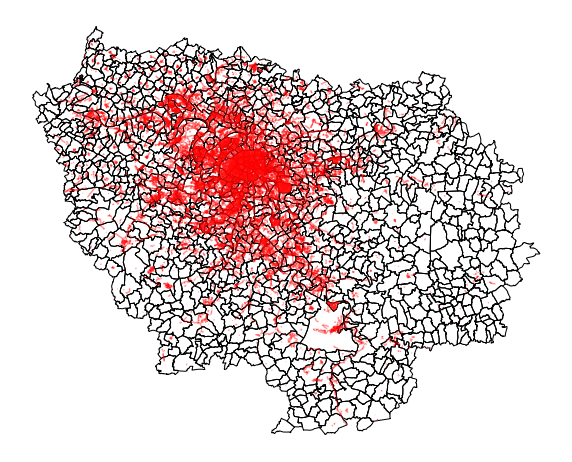

In [60]:
fig,ax = plt.subplots(figsize=(10, 10))
projet.plot(ax = ax, color = 'red', alpha = 0.4, zorder=2)
communes.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none")
ax.set_axis_off()

In [61]:
url4= 'https://data.iledefrance-mobilites.fr/api/explore/v2.1/catalog/datasets/subvention-achat-velo/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B'

In [62]:
subvention=pd.read_csv(url4, sep=';')

In [63]:
subvention.head()

,Municipality,Department,insee_code,Code_postal,EPCI,Nombre de demande,Nombre de demande velo classique avec assistance electrique,Nombre demande velo cargo sans assistance electrique,Nombre demande velo cargo avec assistance electrique,Nombre demande velo pliant sans assistance electrique,Nombre de demande velo pliant avec assistance electrique,Nombre de demande velo adapte
0,CONGERVILLE THIONVILLE,91,91613,91740,CA Étampois Sud-Essonne,5,5,<5,<5,<5,<5,<5
1,ORSONVILLE,78,78472,78660,CA Rambouillet Territoires,5,5,<5,<5,<5,<5,<5
2,BETHEMONT LA FORET,95,95061,95840,CC de la Vallée de l'Oise et des Trois Forêts,5,<5,<5,<5,<5,<5,<5
3,MONTIGNY LE GUESDIER,77,77310,77480,CC Bassée-Montois,6,6,<5,<5,<5,<5,<5
4,VILLEMAREUIL,77,77505,77470,CA du Pays de Meaux,6,6,<5,<5,<5,<5,<5


In [64]:
subvention.describe()

,Department,insee_code,Code_postal
count,1278.000000,1278.000000,1278.000000
mean,83.550078,83661.557121,83833.039124
std,7.790739,7740.147886,7750.465763
min,75.000000,75101.000000,75001.000000
25%,77.000000,77316.250000,77510.000000
50%,78.000000,78312.500000,78465.000000
75%,91.000000,91647.250000,91800.000000
max,95.000000,95690.000000,95880.000000
